In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy.stats as stats

In [2]:
def read_dir_file_names(dirname):
    return [f"{dirname}/{x}" for x in os.listdir(dirname)]


def read_log_file(path):
    return pd.read_csv(path, sep=";|:", names=["Sine number", "Amplitudes", "Frequencies", "Phases", "Decays"], engine='python')

def extract__df_ilocs(paths):
    log_dfs = [read_log_file(x) for x in paths]

    return [df.iloc for df in log_dfs]

In [111]:
POPULATIONS = [544, 1088, 2176, 4352, 8704, 17408, 34816, 69632]

extract__df_ilocs(read_dir_file_names(f"../poptest/{544}"))

pop_ilocs = [
    extract__df_ilocs(read_dir_file_names(f"../poptest/{pop}")) for pop in POPULATIONS
]

elapsed_times = [
    [float(iloc[0, 1].strip().split()[0]) for iloc in ilocs] for ilocs in pop_ilocs
]


mean_elapsed_times = [np.mean(et) for et in elapsed_times]


In [4]:
mean_elapsed_times

[2.200095,
 2.2851904000000003,
 2.4412168000000003,
 2.8858659999999996,
 4.3532128,
 8.318161700000001,
 15.728420499999999,
 30.395731099999995]

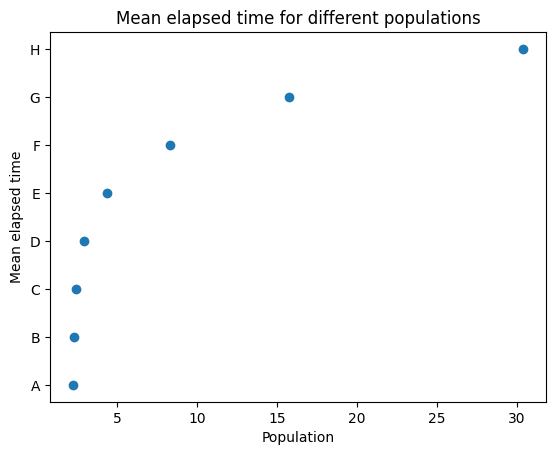

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


In [110]:

plt.scatter(mean_elapsed_times, POPULATIONS)
plt.xlabel('Population')
plt.ylabel('Mean elapsed time')
plt.title('Mean elapsed time for different populations')

plt.show()


In [193]:
POPULATIONS[3:8]

[4352, 8704, 17408, 34816, 69632]

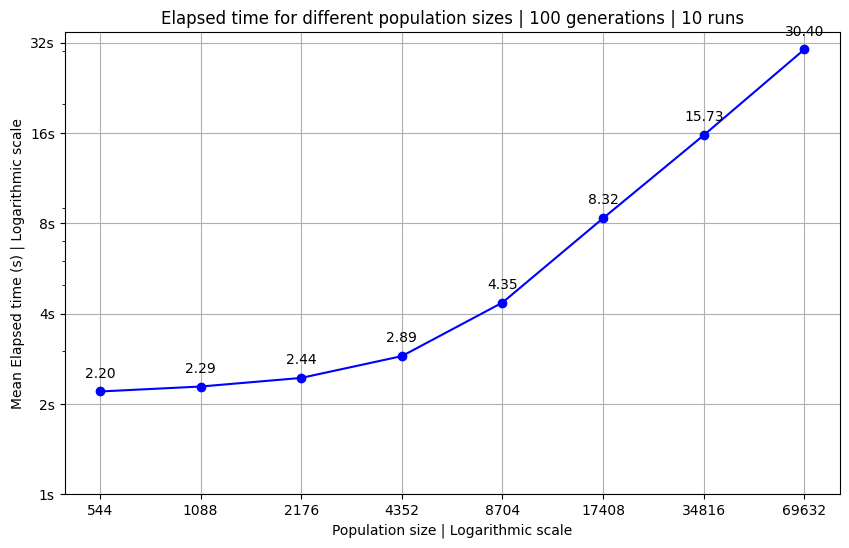

In [236]:
import matplotlib.pyplot as plt

data = mean_elapsed_times


# Create scatter plot
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-', color='blue', label='Data')
plt.xlabel('Population size | Logarithmic scale')
plt.ylabel('Mean Elapsed time (s) | Logarithmic scale')
plt.yscale('log')
plt.title('Elapsed time for different population sizes | 100 generations | 10 runs')
plt.xticks(range(len(data)), POPULATIONS)
plt.yticks([1, 2, 4, 8, 16, 32], ['1s', '2s', '4s', '8s', '16s', '32s'])

plt.grid(True)

for i, txt in enumerate(data):
    accelleration = mean_elapsed_times[i] / mean_elapsed_times[i-1] if i > 0 else 1

    plt.annotate(f'{txt:.2f}', (i, txt), textcoords="offset points", xytext=(0,10), ha='center')
    # plt.annotate(f'{accelleration:.2f}', (i, txt), textcoords="offset points", xytext=(-45, 20), ha='center')

plt.show()


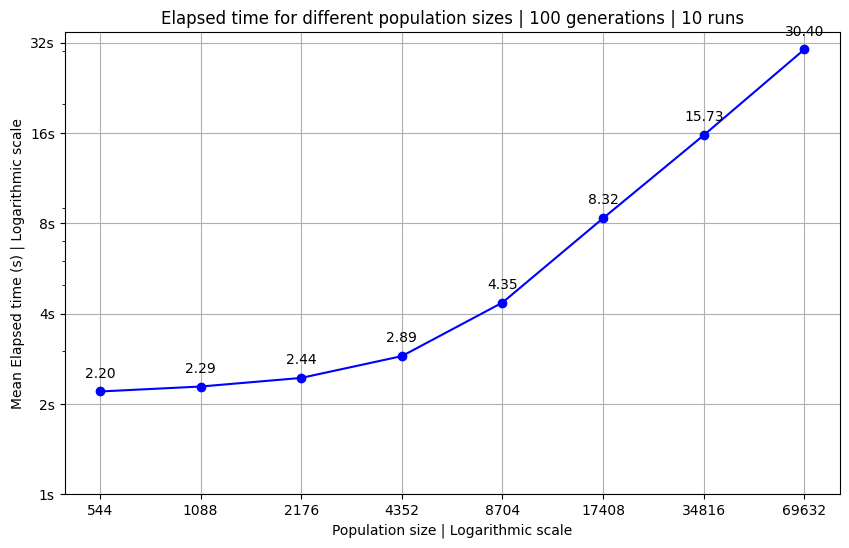

In [235]:
import matplotlib.pyplot as plt

data = mean_elapsed_times


# Create scatter plot
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-', color='blue', label='Data')
plt.xlabel('Population size | Logarithmic scale')
plt.ylabel('Mean Elapsed time (s) | Logarithmic scale')
plt.yscale('log')
plt.title('Elapsed time for different population sizes | 100 generations | 10 runs')
plt.xticks(range(len(data)), POPULATIONS)
plt.yticks([1, 2, 4, 8, 16, 32], ['1s', '2s', '4s', '8s', '16s', '32s'])

plt.grid(True)

for i, txt in enumerate(data):
    accelleration = mean_elapsed_times[i] / mean_elapsed_times[i-1] if i > 0 else 1

    plt.annotate(f'{txt:.2f}', (i, txt), textcoords="offset points", xytext=(0,10), ha='center')
    # plt.annotate(f'{accelleration:.2f}', (i, txt), textcoords="offset points", xytext=(-45, 20), ha='center')

plt.show()

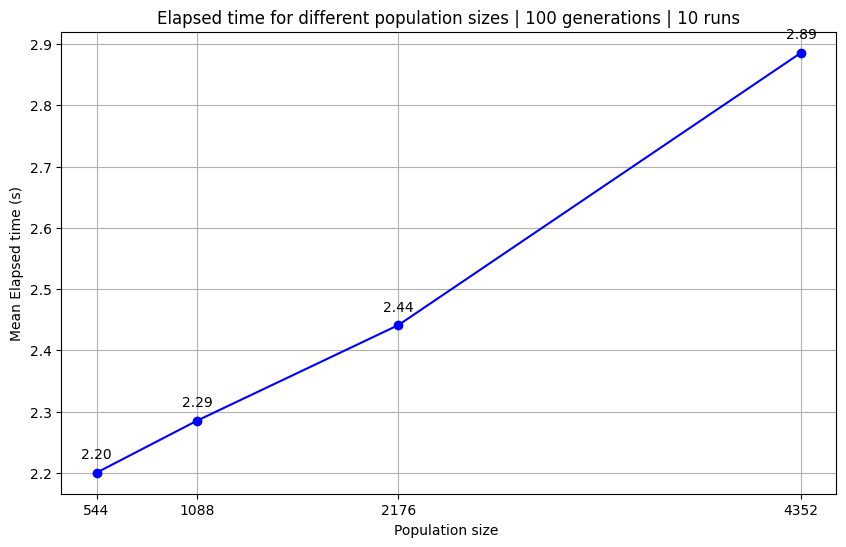

In [234]:
import matplotlib.pyplot as plt

data = mean_elapsed_times[0:4]
x = POPULATIONS[0:4]

plt.figure(figsize=(10, 6))
plt.plot(x, data, marker='o', linestyle='-', color='blue', label='Data')

plt.xlabel('Population size ')
plt.ylabel('Mean Elapsed time (s)')
plt.title('Elapsed time for different population sizes | 100 generations | 10 runs')



# plt.yticks([2, 4, 8, 16, 32], ['2s', '4s', '8s', '16s', '32s'])
plt.xticks([544, 1088, 2176, 4352], ['544', '1088', '2176', '4352'])

plt.grid(True)
# plt.annotate(f'{data[0]:.2f}', (x[0], data[0]), textcoords="offset points", xytext=(0,10), ha='center')
# plt.annotate(f'{data[1]:.2f}', (x[1], data[1]), textcoords="offset points", xytext=(0,10), ha='center')
# plt.annotate(f'{data[2]:.2f}', (x[2], data[2]), textcoords="offset points", xytext=(0,10), ha='center')
# plt.annotate(f'{data[3]:.2f}', (x[3], data[3]), textcoords="offset points", xytext=(0,10), ha='center')

for i, txt in enumerate(data):
    plt.annotate(f'{txt:.2f}', (x[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [142]:
import numpy as np

def remove_outliers_iqr(data):
    data = np.array(data)

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    cleaned_data = data[(data > lower_bound) & (data < upper_bound)]

    return cleaned_data


data = [0.00000000000000000000001, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100000000]
cleaned_data = remove_outliers_iqr(data)
print("Original data:", data)
print("Data with outliers removed using IQR method:", cleaned_data[-1])


Original data: [1e-23, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100000000]
Data with outliers removed using IQR method: 10.0
